# Assignment

Data Science Masters

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables.

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [314]:
df = pd.read_csv('diabetes.csv')

In [315]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [316]:
df.shape

(768, 9)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [318]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [319]:
df.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

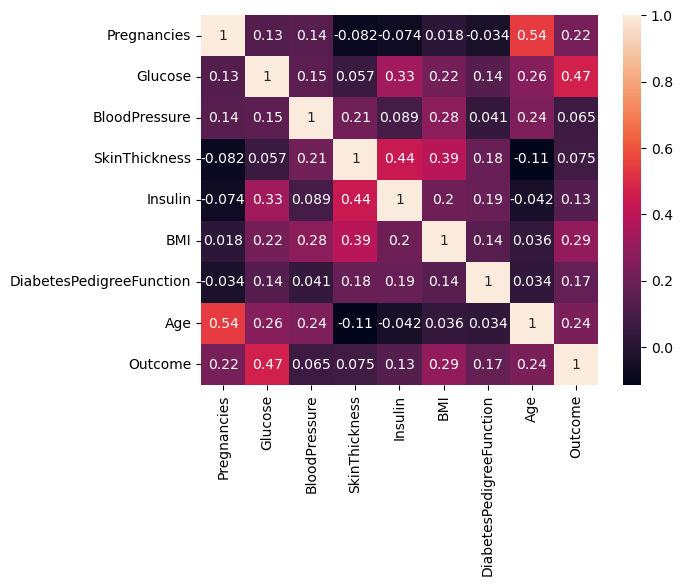

In [320]:
sns.heatmap(df.corr(),annot=True)


In [321]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

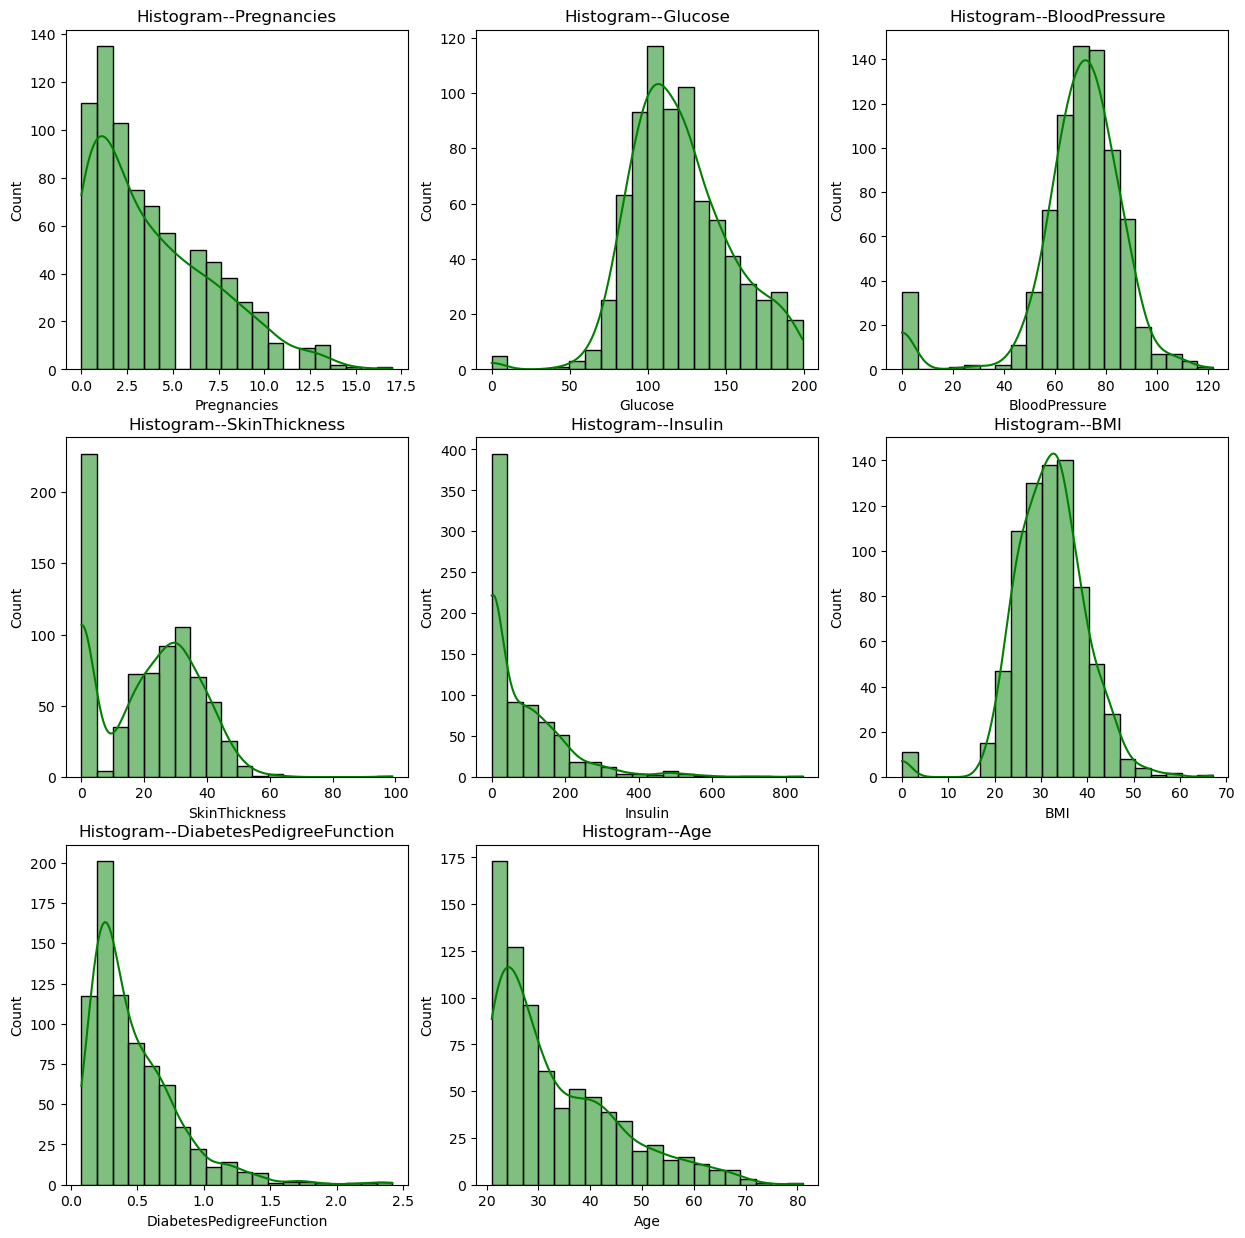

In [322]:
x=1
plt.figure(figsize=(15,15))
for i  in df.columns :
    if i != 'Outcome':
        plt.subplot(3,3,x)
        plt.title(f'Histogram--{i}')
        x=x+1
        sns.histplot(data=df,x=i,bins=20,kde=True,color='g')
plt.show()

In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Observations :
#### 1. Here note that 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' have mininimum Value is 0 But it never be a Zero value it must be something.
#### 2. Pregnancies value may be 0 -- No problem herte

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [324]:
## Checking missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [325]:
## Type of data for each column
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

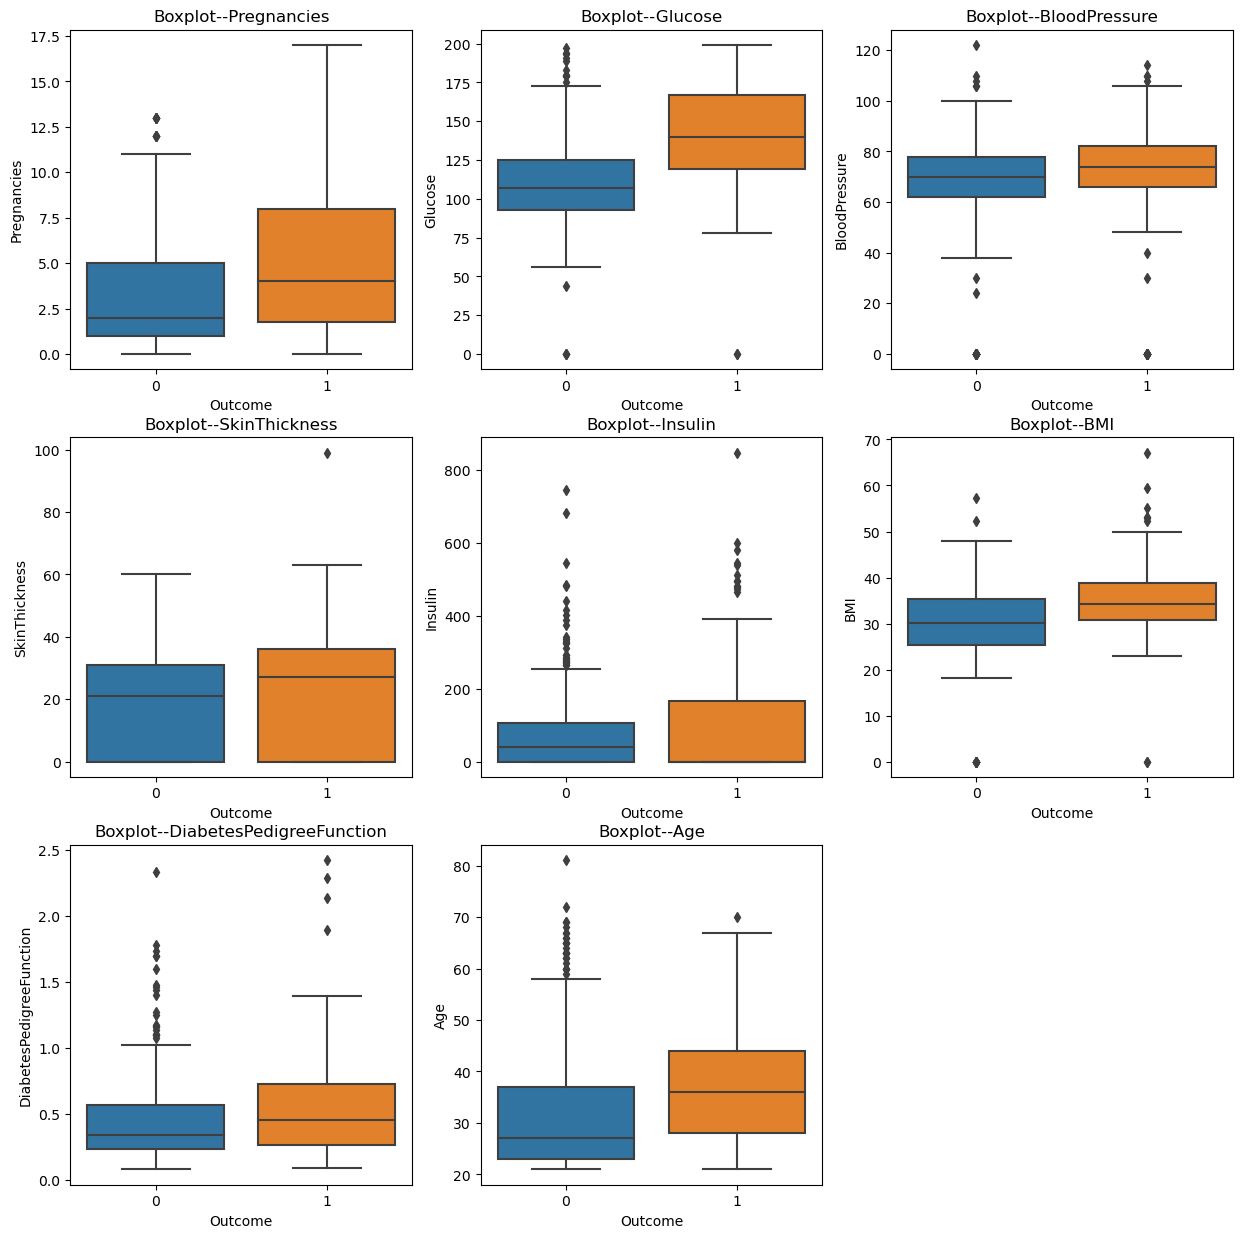

In [326]:
## Outliers checking
x=1
plt.figure(figsize=(15,15))
for i  in df.columns :
    if i != 'Outcome':
        plt.subplot(3,3,x)
        plt.title(f'Boxplot--{i}')
        x=x+1
        sns.boxplot(data=df,x=df['Outcome'],y=i)
plt.show()

### Since there are no categorical data so we don't do any Encoding

### Playing with zero(0) values in columns 'Glucose', 'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI' 

In [327]:
l = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in l :
    print(f'{i}: {len(df[df[i]==0])}')

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [328]:
## Now replacing this all Zero values
l = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in l:
    df[i]=df[i].replace(0,df[i].median())

In [329]:
## Checking xero values now
l = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in l :
    print(f'{i}: {len(df[df[i]==0])}')

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [330]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [331]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [332]:
## Independent and dependent feature
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [333]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [334]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [335]:
## Splittind the  data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [336]:
X_train.shape,y_train.shape

((514, 8), (514,))

In [337]:
X_test.shape,y_test.shape

((254, 8), (254,))

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [338]:
## Hyperparameters

parameter = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random'],
             'max_depth': [1,2,3,4,5],
             'max_features': ['auto', 'sqrt', 'log2']
}

## Model making
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

## GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [339]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [340]:
clf = clf.best_estimator_

In [341]:
## Prediction
y_pred = clf.predict(X_test)

In [342]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [387]:
clf.predict_proba(X_test)

array([[0.60204082, 0.39795918],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.8125    , 0.1875    ],
       [0.60204082, 0.39795918],
       [0.92207792, 0.07792208],
       [0.60204082, 0.39795918],
       [0.22222222, 0.77777778],
       [0.60204082, 0.39795918],
       [0.37704918, 0.62295082],
       [0.55      , 0.45      ],
       [0.22222222, 0.77777778],
       [0.60204082, 0.39795918],
       [0.75609756, 0.24390244],
       [0.60204082, 0.39795918],
       [0.60204082, 0.39795918],
       [0.75609756, 0.24390244],
       [0.22222222, 0.77777778],
       [0.75609756, 0.24390244],
       [0.60204082, 0.39795918],
       [0.60204082, 0.39795918],
       [0.37704918, 0.62295082],
       [1.        , 0.        ],
       [0.37704918, 0.62295082],
       [0.26666667, 0.73333333],
       [0.92207792, 0.07792208],
       [0.85714286, 0.14285714],
       [0.55      , 0.45      ],
       [0.60204082, 0.39795918],
       [0.

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,  precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [343]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [344]:
## Accuracy
print('Accuracy is', accuracy_score(y_pred,y_test))

Accuracy is 0.7047244094488189


In [345]:
## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       168
           1       0.58      0.45      0.51        86

    accuracy                           0.70       254
   macro avg       0.67      0.64      0.65       254
weighted avg       0.69      0.70      0.69       254



[[140  47]
 [ 28  39]]


<AxesSubplot: >

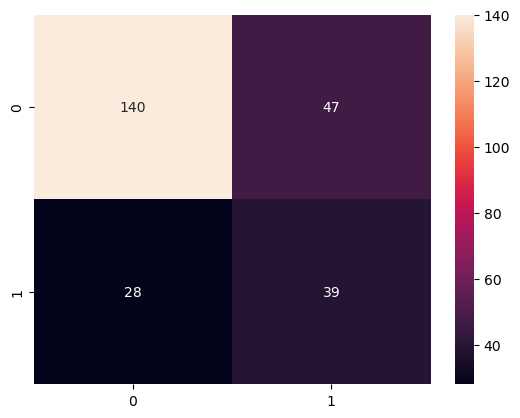

In [346]:
## Confusion matrix
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

In [347]:
print(roc_auc_score(y_pred,y_test))

0.665376326921542


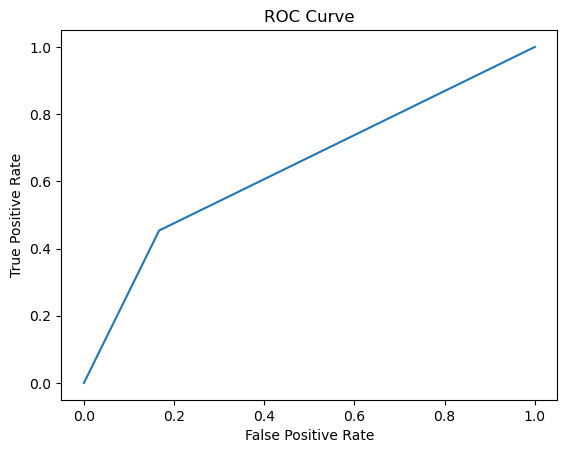

In [348]:
## ROC curve
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

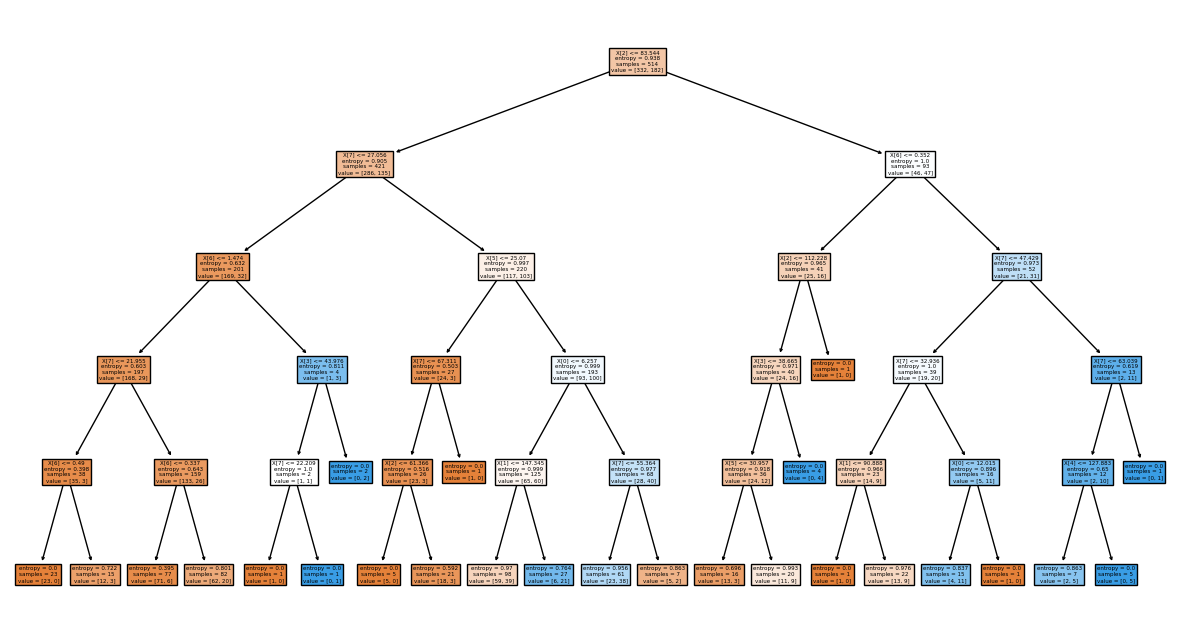

In [349]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf,filled=True)
plt.show()

In [350]:
## Important Features
imp = clf.feature_importances_
imp = pd.Series(imp)
imp.index = X_train.columns
imp = imp.sort_values(ascending=False)
imp

Age                         0.417460
DiabetesPedigreeFunction    0.164254
BMI                         0.134668
Glucose                     0.089006
BloodPressure               0.086395
SkinThickness               0.062998
Pregnancies                 0.029450
Insulin                     0.015770
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances'}, ylabel='Importance'>

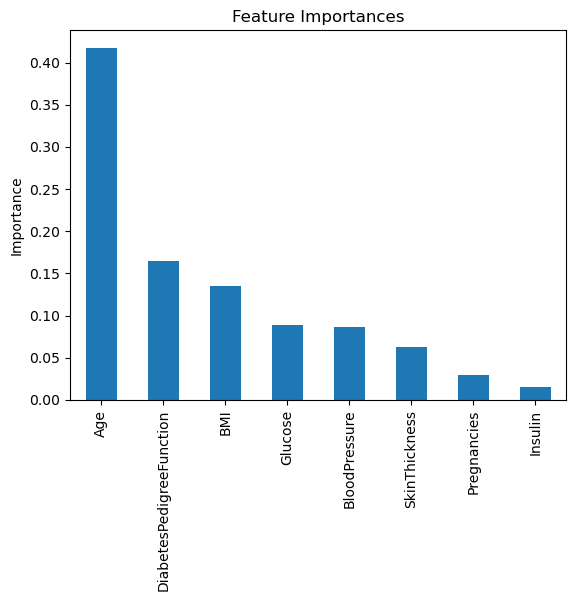

In [351]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')

## Top 5 most important Features for Predicting Diabetes are :
1. Age
2. Diabetes Pedigree function
3. BMI
4. Glucose
5. Blood Pressure

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in thev dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [388]:
patient_data = {
    'Pregnancies':[1],
    'Glucose':[89],
    'BloodPressure':[66],
    'SkinThickness':[23],
    'Insulin':[94],
    'BMI':[28.1],
    'DiabetesPedigreeFunction':[0.167],
    'Age':[21]
}

In [389]:
df_data = pd.DataFrame(patient_data)
df_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21


In [390]:
pred = clf.predict(df_data)[0]
pred

0

In [394]:
if pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {clf.predict_proba(df_data)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {clf.predict_proba(df_data)[0][1]}')

Patient is non Diabetic
Probaibility of diabetic : 0.0
